# P01: Write a Data Science Blog Post

## 1. Business Understanding

The data was downloaded from: https://www.kaggle.com/airbnb/seattle/data

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA. Using this dataset, I am going to answer the following price-related business questions:

### Pricing:
- What is the cheapest time to travel? How do prices fluctaute? When are prices above or below average?
- What properties are most expensive?
- Do prices differ by neighbourhood? If so, how much?
- Is it possible to predict prices for a specific listing?
- What is the busiest time to visit Seattle?

### Listings:
- Is there a connection between reviews and neigbourhood?
- Which neighbourhood has the most offers?
- How long is the host repsonse time?
- What property types are offered?
- Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?
- Can we predict prices based on the given data?

### Business Questions:
1. Which Neighbourhood is the most attractive one?
2. What time is best to travel to Seattle if you want to make a bargain (prices and availiability of porperties)?
3. What property is the chepest to live in and where do I get hte biggest location for little money?
4. Is it possible to predict prices based on the given data?

## 2. Data Understanding
Import of necessary libraries and data sets in order to get a better understanding of provided data

In [231]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import calendar
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sb
%matplotlib inline

In [232]:
# calendar data set
df_c = pd.read_csv("calendar.csv")
df_c.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [201]:
# listings data set
df_l = pd.read_csv("listings.csv")
df_l.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
# reviews data set
df_r = pd.read_csv("reviews.csv")
df_r.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Focus on: Calendar Data Set
- What are the dimensions of the data set?
- Identify columns and rows with missing values? How can I handle these NANs?
- General exploration


In [8]:
# dimensions
df_c.shape

(1393570, 4)

In [9]:
# Nans
df_c.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [10]:
# general explorationd
df_c.describe(include = 'all')

,listing_id,date,available,price
count,1.393570e+06,1393570,1393570,934542
unique,NaN,365,2,669
top,NaN,2016-04-17,t,$150.00
freq,NaN,3818,934542,36646
mean,5.550111e+06,NaN,NaN,NaN
std,2.962274e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,3.258213e+06,NaN,NaN,NaN
50%,6.118244e+06,NaN,NaN,NaN
75%,8.035212e+06,NaN,NaN,NaN


#### Findings
It shows that the data set "Calendar" has 1.393.570 rows and 4 columns. There are 459.028 missing values und the price column. All other columns have values in all rows. Due to the NANs, there will be some data preparation.

## Focus on: Listings Data Set
- What are the dimensions of the data set?
- Identify columns and rows with missing values? How can I handle these NANs?
- What dTypes are used?
- General exploration

In [11]:
# dimensions
df_l.shape

(3818, 92)

In [12]:
# columns
list (df_l.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [13]:
# Nans
df_l.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [14]:
# general exploration
df_l.describe(include = 'all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3818,3.818000e+03,3818,3818,3641,3249,3818,3818,2786,...,3162.000000,3818,0.0,3818,3818,3818,3818,3818,3818.000000,3191.000000
unique,NaN,3818,NaN,1,3792,3478,3119,3742,1,2506,...,NaN,1,NaN,1,2,3,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/9634448,NaN,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3818,3,15,14,10,3818,17,...,NaN,3818,NaN,3818,3227,1417,3497,3443,NaN,NaN
mean,5.550111e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.452245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.946307,2.078919
std,2.962660e+06,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.750259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.893029,1.822348
min,3.335000e+03,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.020000
25%,3.258256e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.695000
50%,6.118244e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.540000
75%,8.035127e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000


In [15]:
# general exploration of categorical variables: host response time
host_response_time_vals = df_l.host_response_time.value_counts()

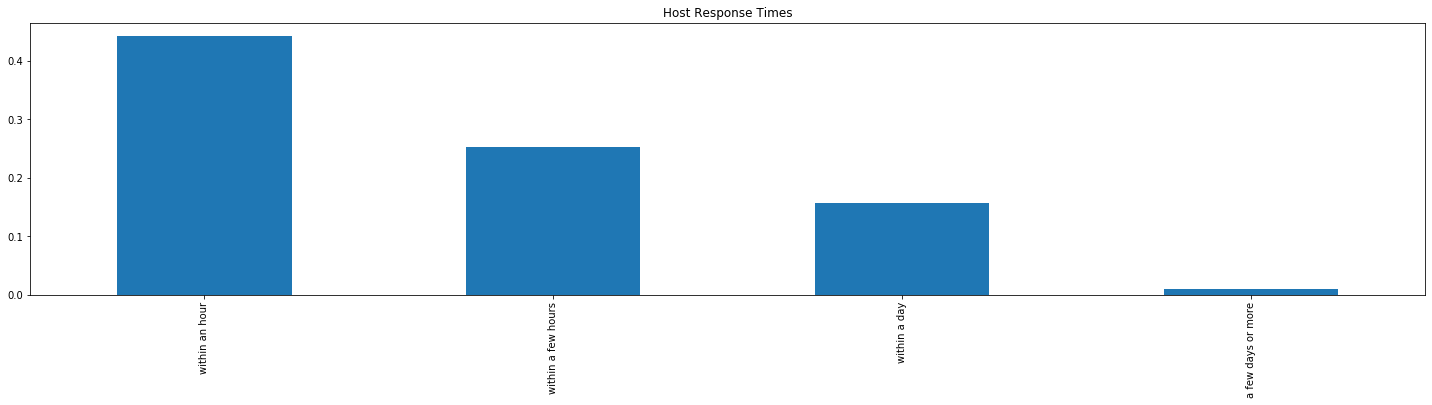

In [16]:
(host_response_time_vals/df_l.shape[0]).plot(kind="bar", figsize=(25,5));
plt.title("Host Response Times");

In [17]:
# general exploration of categorical variables: host response rate
host_response_rate_vals = df_l.host_response_rate.value_counts()

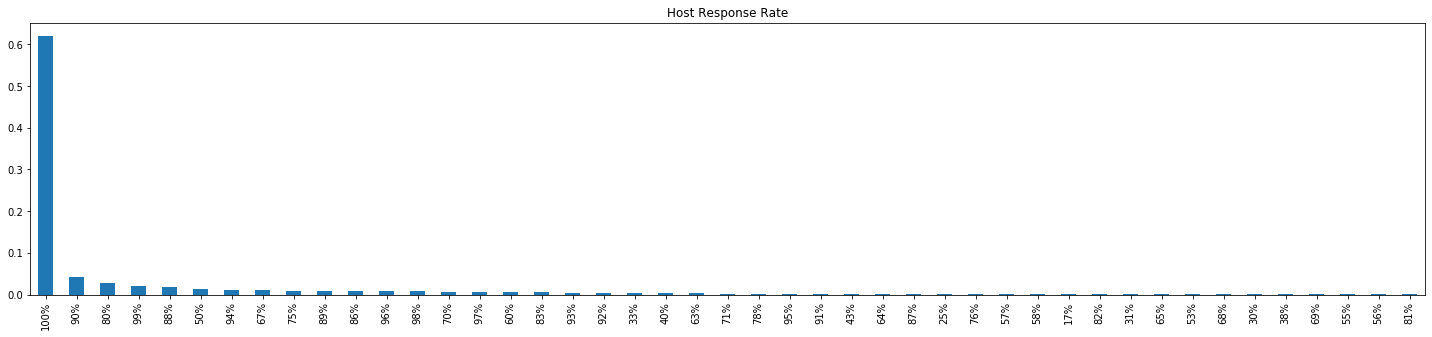

In [18]:
(host_response_rate_vals/df_l.shape[0]).plot(kind="bar", figsize=(25,5));
plt.title("Host Response Rate");


In [19]:
# general exploration of categorical variables: neighbourhood
neighbourhoos_vals = df_l.neighbourhood_group_cleansed.value_counts()

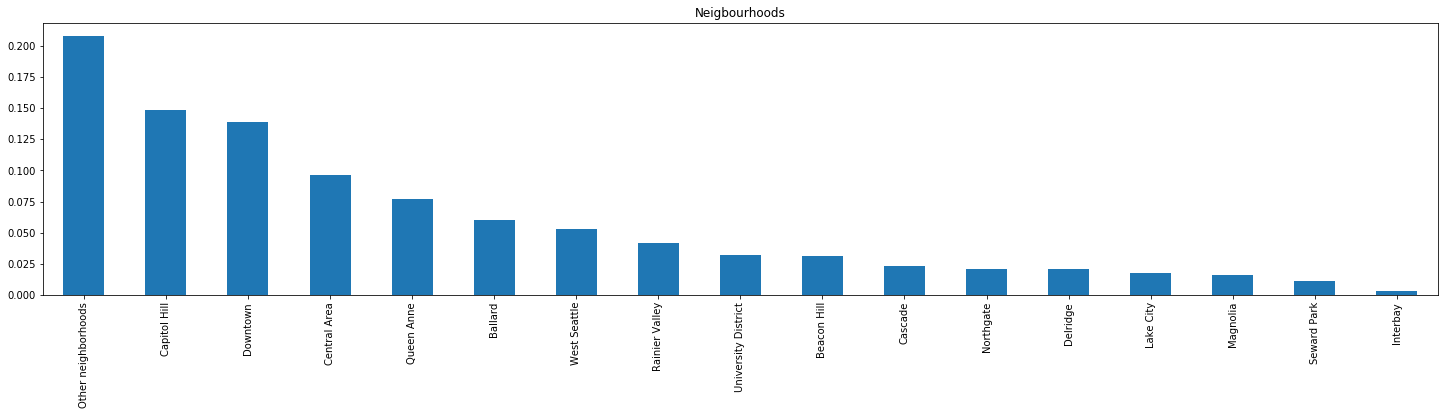

In [20]:
(neighbourhoos_vals/df_l.shape[0]).plot(kind="bar", figsize=(25,5));
plt.title("Neigbourhoods");

In [21]:
# general exploration of categorical variables: host_location
df_l.host_location.value_counts()

Seattle, Washington, United States        3259
US                                         246
Spokane, Washington, United States          41
Kent, Washington, United States             34
Los Angeles, California, United States      13
                                          ... 
Houston, Texas, United States                1
Greenbank, Washington, United States         1
Lowell, Massachusetts, United States         1
Long Beach, California, United States        1
Chelan, Washington, United States            1
Name: host_location, Length: 120, dtype: int64

In [22]:
# general exploration of categorical variables: property types
property_type_vals = df_l.property_type.value_counts()

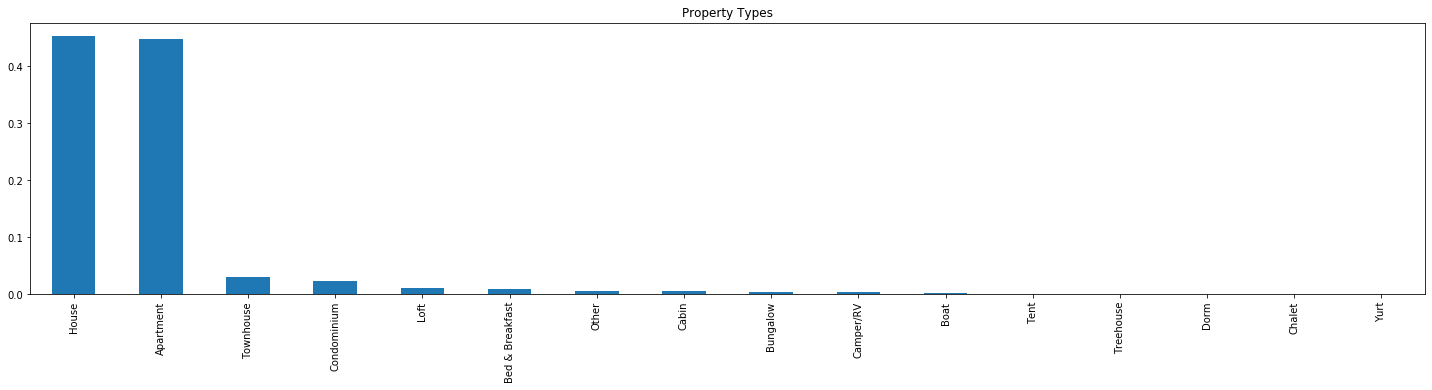

In [23]:
(property_type_vals/df_l.shape[0]).plot(kind="bar", figsize=(25,5));
plt.title("Property Types");

#### Findings
It shows that the data set "Listing" has 3818 rows and 92 columns. There are missing values in several columns. Column "Experience offered" is None for all rows and can consequently be deleted!  Due to the NANs, there will be some data preparation. There might also be some standardization necessary!

Others:
Most hosts response within an hour. Captitol Hill is the neighbourhood with most inserations. Most offered properties are houses or appartments.

## Focus on: Reviws Data Set
- What are the dimensions of the data set?
- Identify columns and rows with missing values? How can I handle these NANs?
- What dTypes are used?
- General exploration

In [24]:
# dimensions
df_r.shape

(84849, 6)

In [25]:
# Nans
df_r.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [26]:
# general exploration
df_r.describe(include = 'all')

,listing_id,id,date,reviewer_id,reviewer_name,comments
count,8.484900e+04,8.484900e+04,84849,8.484900e+04,84849,84831
unique,NaN,NaN,1930,NaN,14380,84136
top,NaN,NaN,2015-09-21,NaN,David,The host canceled this reservation the day bef...
freq,NaN,NaN,580,NaN,870,57
mean,3.005067e+06,3.058765e+07,NaN,1.701301e+07,NaN,NaN
std,2.472877e+06,1.636613e+07,NaN,1.353704e+07,NaN,NaN
min,4.291000e+03,3.721000e+03,NaN,1.500000e+01,NaN,NaN
25%,7.946330e+05,1.725127e+07,NaN,5.053141e+06,NaN,NaN
50%,2.488228e+06,3.228809e+07,NaN,1.413476e+07,NaN,NaN
75%,4.694479e+06,4.457648e+07,NaN,2.762402e+07,NaN,NaN


#### Findings
It shows that the data set "Listing" has 84.849 rows and 6 columns. There are missing values in the comment column.  Due to the NANs, there will be some data preparation.

## 3. Data Preparation
### ...with focus on prices
1. Analysis of price fluctautions



In [27]:
# show data set
df_c.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


/Users/felixburkhardt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


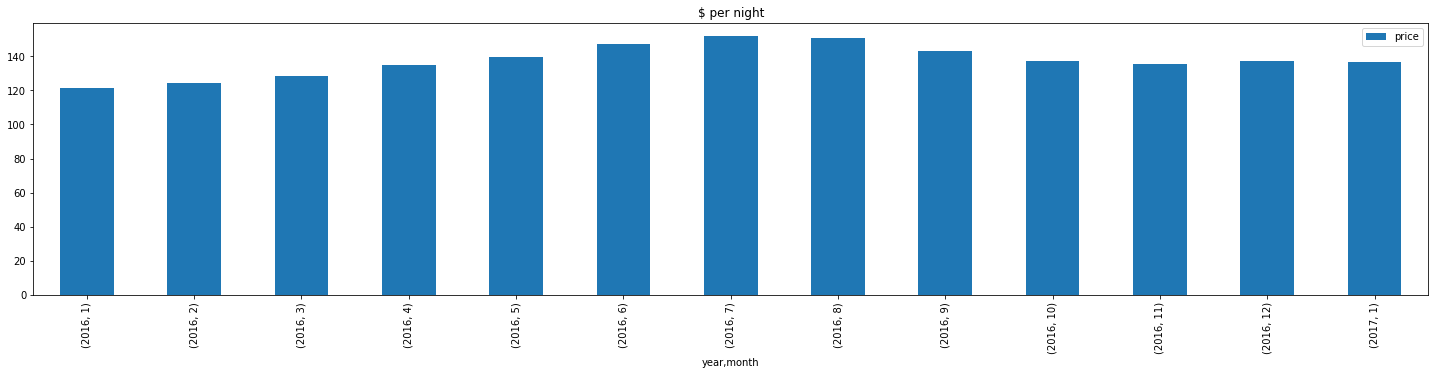

In [28]:
# modify date column by separating it in month and year
df_c.dtypes
df_c['year'] = pd.DatetimeIndex(df_c['date']).year
df_c['month'] = pd.DatetimeIndex(df_c['date']).month
# as rows with no prices are irrelevant for analysis, drop rows with NAN
df_c_corrected = df_c.dropna(axis=0)
#convert datatype of proce from object to float
df_c_corrected.price = df_c_corrected.price.replace('[\$,]', '', regex=True).astype(float);
# show prices over the year
df_c_corrected.groupby(['year','month'])[['price']].mean().plot(kind="bar", figsize=(25,5));
plt.title("$ per night");

2. What properties are most expensive?

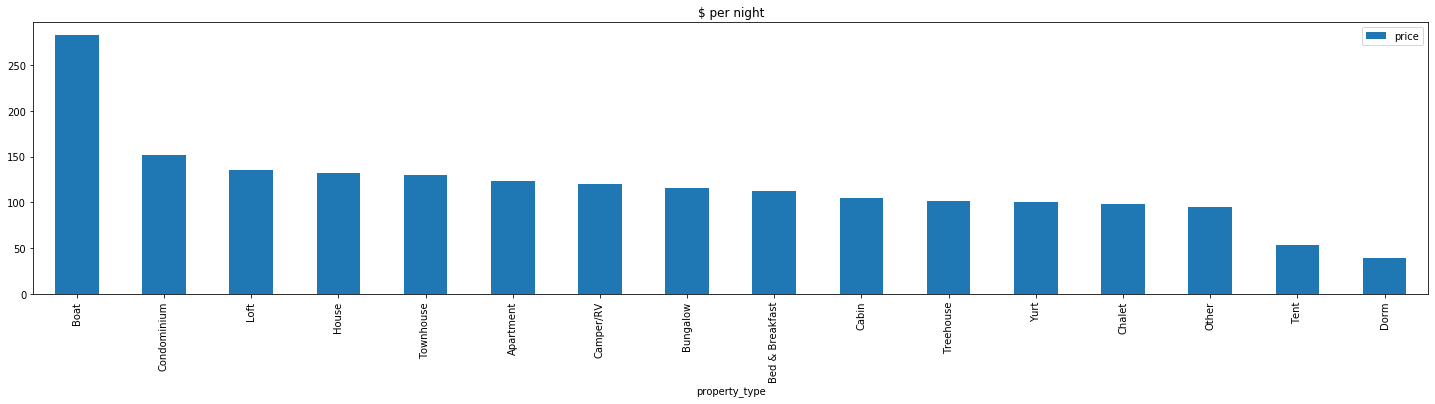

In [29]:
# as rows with no prices are irrelevant for analysis, drop rows with NAN
df_l_corrected = df_l.dropna(subset=['price'], how ='any')
#convert datatype of proce from object to float
df_l_corrected.price = df_l_corrected.price.replace('[\$,]', '', regex=True).astype(float);
# show prices in relation to property
df_l_corrected.groupby(['property_type'])[['price']].mean().sort_values(by='price', ascending=False).plot(kind="bar", figsize=(25,5));
plt.title("$ per night");

3. Wich neighbourhood is most expensive?

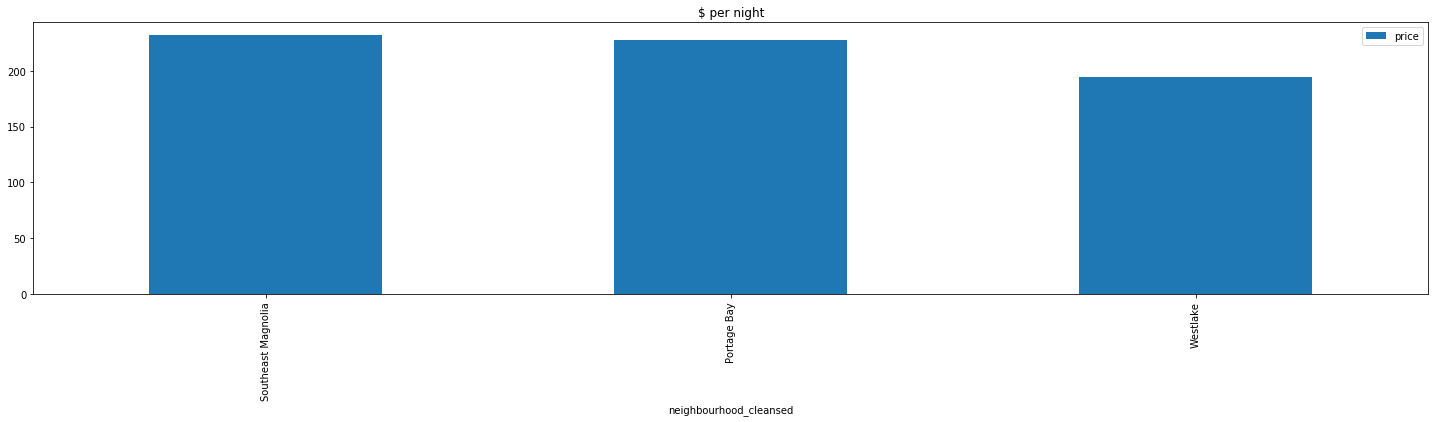

In [383]:
# show prices in relation to neighbourhood
top15_n = df_l_corrected.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price', ascending=False).head(3)

top15_n.plot(kind="bar", figsize=(25,5));
plt.title("$ per night");

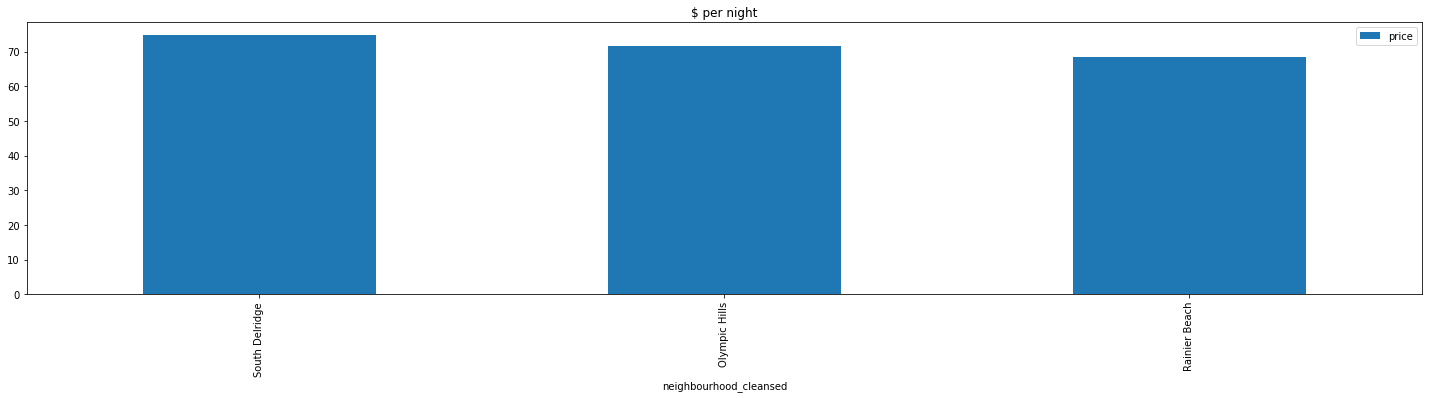

In [386]:
# show prices in relation to neighbourhood
bot10_n = df_l_corrected.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price', ascending=False).tail(3)

bot10_n.plot(kind="bar", figsize=(25,5));
plt.title("$ per night");

4. Correlation Appartment-Type, Neighbourhood and price

In [32]:
# Find Correlation between Appartment-Type and Neighbourhood
# bring together df_l and df_c
# https://stackoverflow.com/questions/41463119/join-two-dataframes-on-common-column-in-python
df_l_c = pd.merge(df_l, df_c, left_on='id', right_on='listing_id', how='left').drop('listing_id', axis=1)

In [33]:
df_l_c_corrected = df_l_c[['property_type', 'neighbourhood_group_cleansed','price_x']].copy()

In [34]:
df_l_c_corrected.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    289810
Capitol Hill           206955
Downtown               193450
Central Area           134685
Queen Anne             107675
Ballard                 83950
West Seattle            74095
Rainier Valley          58035
University District     44530
Beacon Hill             43070
Cascade                 32485
Northgate               29200
Delridge                28835
Lake City               24455
Magnolia                22265
Seward Park             16060
Interbay                 4015
Name: neighbourhood_group_cleansed, dtype: int64

In [35]:
#convert datatype of price from object to float
df_l_c_corrected.price_x = df_l_c_corrected.price_x.replace('[\$,]', '', regex=True).astype(float);

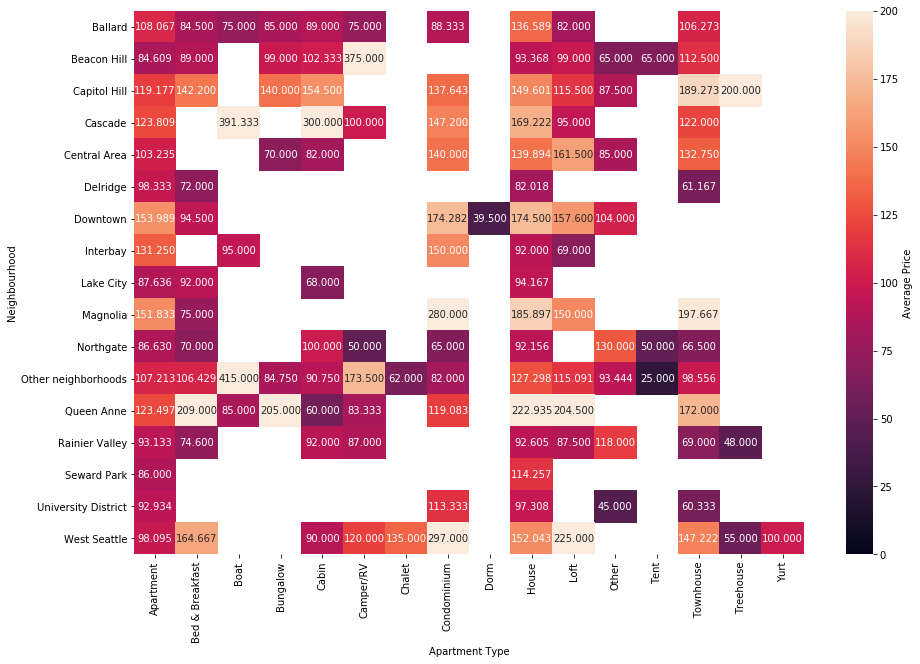

In [36]:
# Heatmap
plt.figure(figsize=[15, 10])
cat_means = df_l_c_corrected.groupby(['property_type', 'neighbourhood_group_cleansed']).mean()['price_x']
cat_means = cat_means.reset_index(name = 'price')
cat_means = cat_means.pivot(index = 'neighbourhood_group_cleansed', columns = 'property_type',
                            values = 'price')

sb.heatmap(cat_means, annot = True, fmt = '.3f',vmin=0, vmax = 200,
           cbar_kws = {'label' : 'Average Price'})

plt.xlabel('Apartment Type')
plt.ylabel('Neighbourhood');


5. Correlation Appartment-Type, Neighourhood and price per sqf

In [37]:
df_l_c.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [38]:
# Identify price per square feet per neighbourhood
df_l_c_corrected1 = df_l_c[['property_type', 'neighbourhood_group_cleansed','price_x','square_feet']].copy()
#convert datatype of price from object to float
df_l_c_corrected1.price_x = df_l_c_corrected1.price_x.replace('[\$,]', '', regex=True).astype(float);
df_l_c_corrected1.square_feet = df_l_c_corrected1.square_feet.astype(float);
df_l_c_corrected1['dollar_per_sqf']=(df_l_c_corrected1['price_x']/df_l_c_corrected1['square_feet'])
df_l_c_corrected1 = df_l_c_corrected1.dropna(subset=['square_feet'], how ='any')

In [39]:
df_l_c_corrected1.describe()

,price_x,square_feet,dollar_per_sqf
count,35405.000000,35405.000000,3.540500e+04
mean,146.597938,854.618557,inf
std,89.528736,667.944510,NaN
min,40.000000,0.000000,2.000000e-02
25%,90.000000,420.000000,1.316667e-01
50%,120.000000,750.000000,1.830769e-01
75%,175.000000,1200.000000,2.588462e-01
max,673.000000,3000.000000,inf


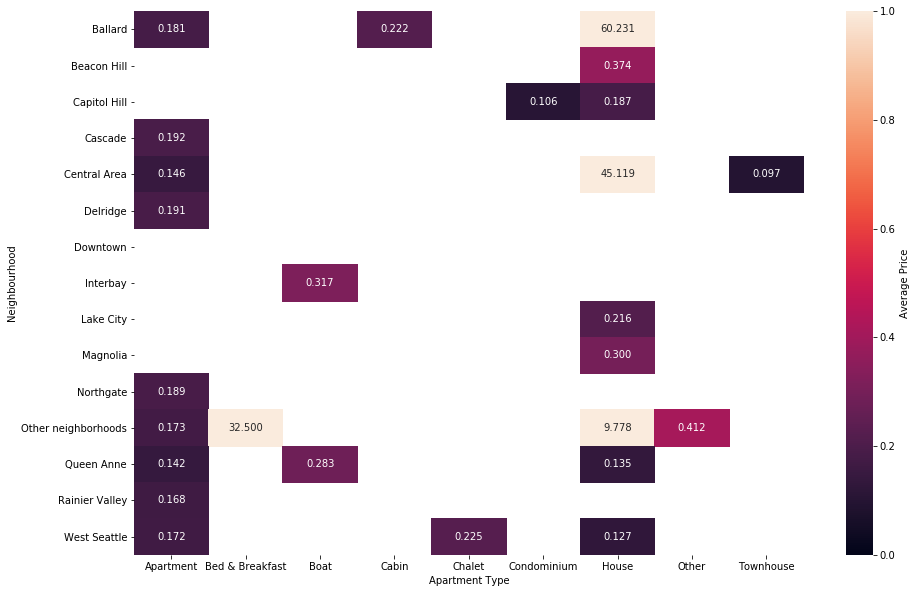

In [40]:
# How heatmap of dollar per sqf per night
# Heatmap
plt.figure(figsize=[15, 10])
cat_means = df_l_c_corrected1.groupby(['property_type', 'neighbourhood_group_cleansed']).mean()['dollar_per_sqf']
cat_means = cat_means.reset_index(name = 'price')
cat_means = cat_means.pivot(index = 'neighbourhood_group_cleansed', columns = 'property_type',
                            values = 'price')

sb.heatmap(cat_means, annot = True, fmt = '.3f', vmin=0, vmax = 1,
           cbar_kws = {'label' : 'Average Price'})


plt.xlabel('Apartment Type')
plt.ylabel('Neighbourhood');

6. In which month are most appartments availiable?

In [41]:
df_c['year'] = pd.DatetimeIndex(df_c['date']).year
df_c['month'] = pd.DatetimeIndex(df_c['date']).month
# Drop column with yeahr 2017
df_c_corrected3 = df_c[df_c.year != 2017]
#convert datatype of proce from object to float
df_c_corrected3.price = df_c_corrected3.price.replace('[\$,]', '', regex=True).astype(float);

/Users/felixburkhardt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


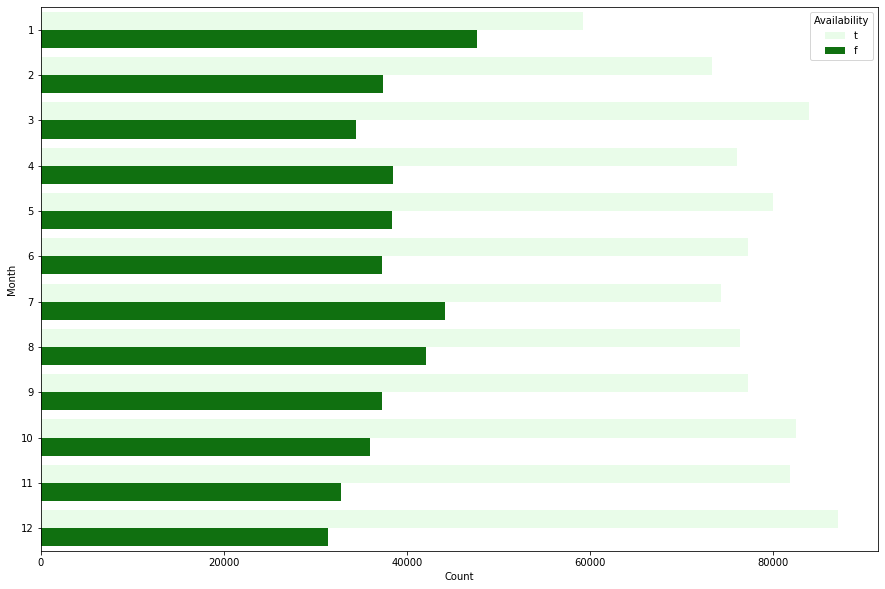

In [42]:
# Countplot to compare availiability by month
plt.figure(figsize=[15, 10])

sb.countplot(data = df_c_corrected3, y='month', hue = 'available', color='g')
plt.xlabel('Count')
plt.ylabel('Month')
plt.legend(title="Availability");

#### Findings
1. June, July and August are the most expensive months
2. Boat, Condominium and Loft are in avarage the most expensive places to stay
3. Southern Magnolia and Portage Bay are in avarage the most expensive neighbourhoods
4. Rainier Beach is the cheapest neighbourhood
5. Staying in a dorm in downtown is comparatively cheap
6. Staying on a boat in Cascade is very exclusive and expensive
7. The prices per sqf in houses is comparatively high
8. The general availiability of accomondations is low in Junem July and August as well as in January

### ...with focus on reviews

In [43]:
#only keep columns of interest
df_r.head (5)
df_r_corrected = df_r[['listing_id','comments']].copy()
df_r_corrected

,listing_id,comments
0,7202016,Cute and cozy place. Perfect location to every...
1,7202016,Kelly has a great room in a very central locat...
2,7202016,"Very spacious apartment, and in a great neighb..."
3,7202016,Close to Seattle Center and all it has to offe...
4,7202016,Kelly was a great host and very accommodating ...
...,...,...
84844,3624990,The description and pictures of the apartment ...
84845,3624990,We had an excellent stay. It was clean and com...
84846,3624990,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,"Very good apartement, clean and well sized. Si..."


In [44]:
#correlate neighbourhood and listing_id

def get_neighborhood(listing_id):
    
    '''
    Function gives back the neighbourhood from df_l that correlates to the given listing_id
   
    INPUT:
    listing_id
    
    OUTPUT:
    neighbourhood
    
    '''
    neighbourhood = df_l.loc[df_l['id'] == listing_id, 'neighbourhood_cleansed'].iloc[0]
    
    return neighbourhood


In [45]:
# Apply function
df_r_corrected['Neighbourhood'] = df_r_corrected['listing_id'].apply(get_neighborhood)
df_r_corrected.head (4)

,listing_id,comments,Neighbourhood
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne


In [52]:
# Calculate satisfaction Score
# https://github.com/cjhutto/vaderSentiment
# https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
analyser = SentimentIntensityAnalyzer()
def get_satisfactionsore (comments):
    
    '''
    Function that runs the sentiment intensity analyzer on a given sentence in the comments column and returns compound polarity score
    
    INPUT:
    sentence - text in comments column
    
    OUTPUT:
    score['compound'] - the compound score which combines the positive, negative and neutral scores
    
    Provides the compound score for a particular sentence for sentiment analysis
    '''
    
    comment = str(comments)
    score = analyser.polarity_scores(comment)
    return score['compound']

In [63]:
# Apply function
df_r_corrected['Score'] = df_r_corrected['comments'].apply(get_satisfactionsore)
df_r_corrected.head (4)

,listing_id,comments,Neighbourhood,Score
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,0.7901
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,0.9875
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,0.8718
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,0.8313


<Figure size 1080x720 with 0 Axes>

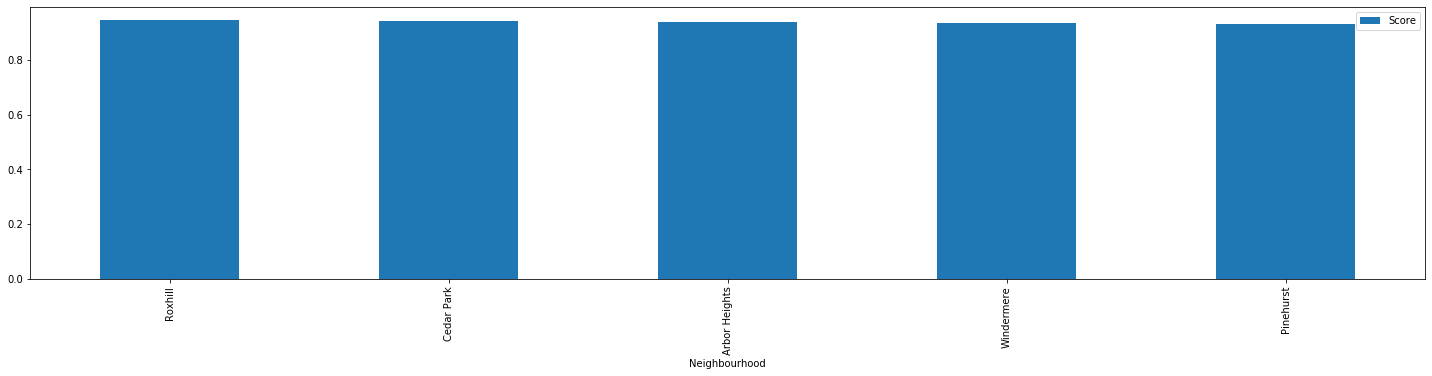

In [183]:
# Group by Neighbourhood and average Score
neighbourhood_score = df_r_corrected.groupby('Neighbourhood')[['Score']].mean().sort_values(by='Score',ascending=False)

# Visualize Top 5
plt.figure(figsize=[15, 10])
neighbourhood_score.head(5).plot(kind='bar',figsize=(25,5));

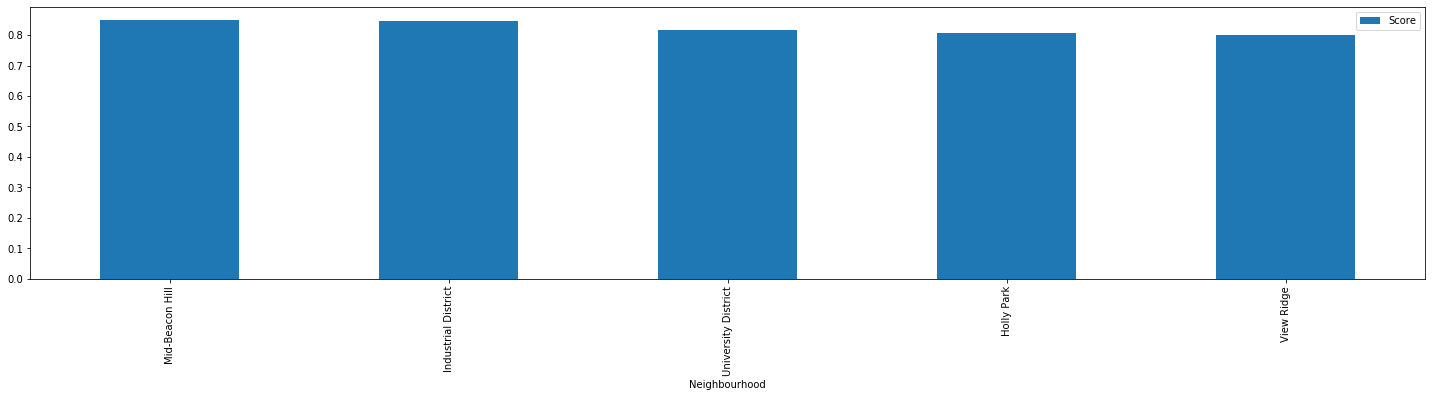

In [184]:
# Visulize worst 5
neighbourhood_score.tail(5).plot(kind='bar',figsize=(25,5));

In [185]:
# Categorize Score
df_r_corrected_c = df_r_corrected.copy()
df_r_corrected.dtypes
df_r_corrected_c['Category'] = pd.cut(df_r_corrected_c['Score'], bins=[-1, -0.5, 0.5, 1], include_lowest=True, labels=['poor', 'okay', 'good'])
df_r_corrected_c

,listing_id,comments,Neighbourhood,Score,Category
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,0.7901,good
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,0.9875,good
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,0.8718,good
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,0.8313,good
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,0.9783,good
...,...,...,...,...,...
84844,3624990,The description and pictures of the apartment ...,First Hill,0.9498,good
84845,3624990,We had an excellent stay. It was clean and com...,First Hill,0.8658,good
84846,3624990,"Gran ubicación, cerca de todo lo atractivo del...",First Hill,0.0000,okay
84847,3624990,"Very good apartement, clean and well sized. Si...",First Hill,0.7233,good


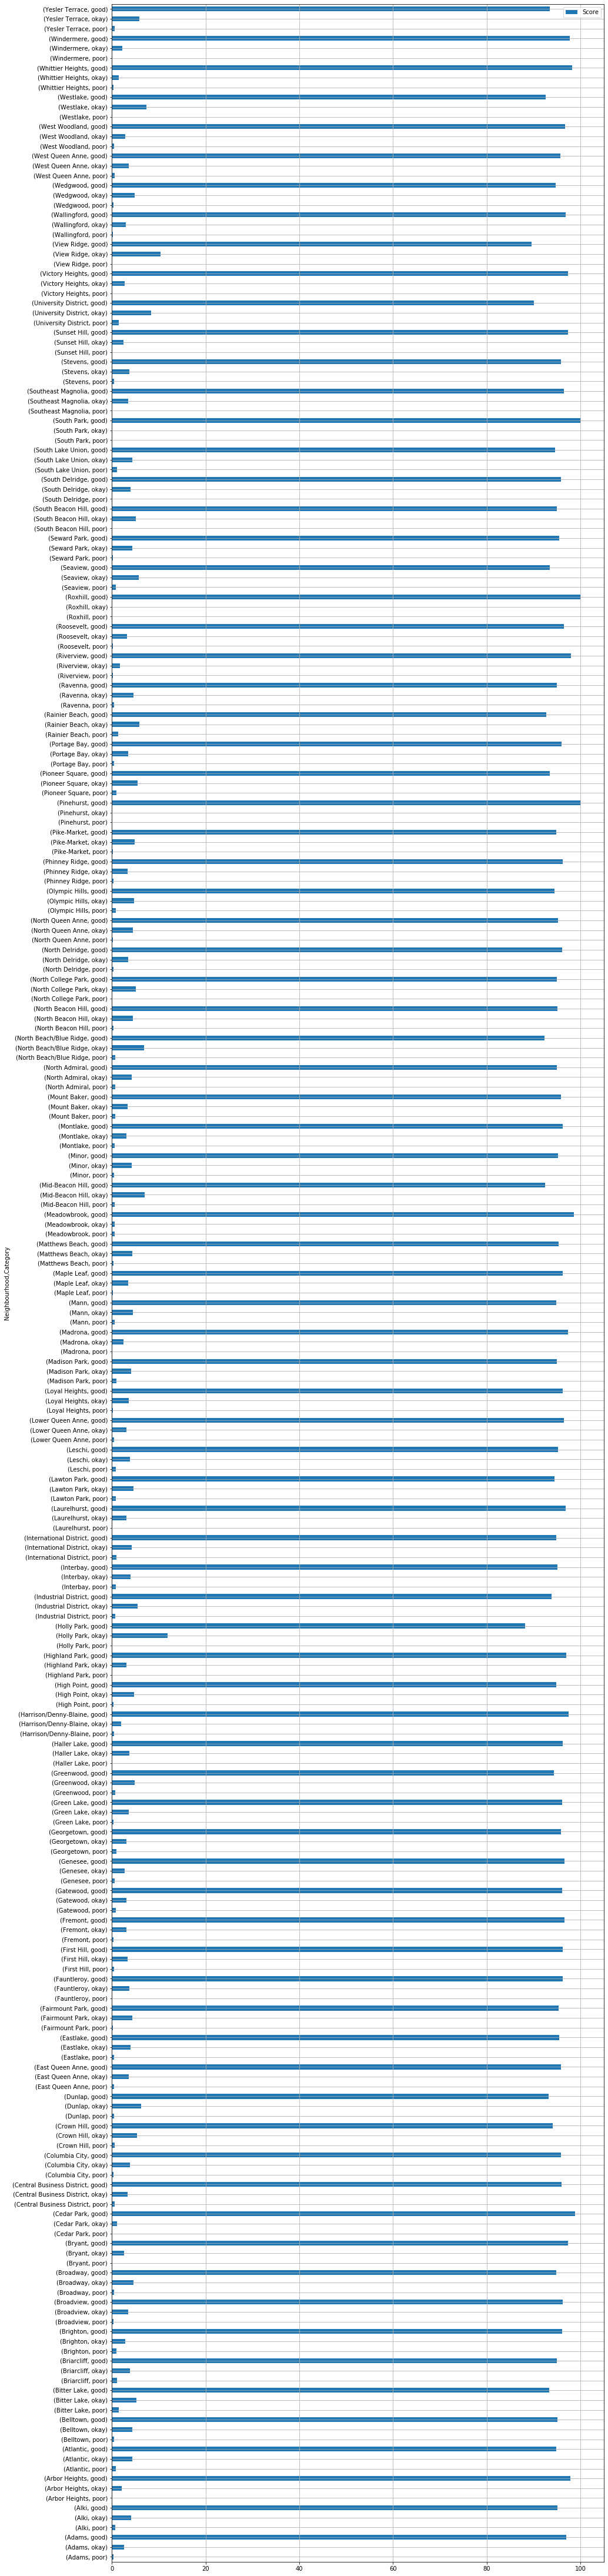

In [169]:
# Show percentage distribution per Neighbourhood
#https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby

df_r_corrected_c2 = df_r_corrected_c.groupby(['Neighbourhood','Category'])[['Score']].count()
rate_pcts = df_r_corrected_c2.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
diagram = rate_pcts.plot(kind="barh",stacked=True, figsize=(15,80))
diagram.grid(zorder=100)


#### Findings
1. Arbour Heights, Roxhill and Cedar Park do relatively have the most good ratings
2. Holly Park, View Ridge and University district and Bitter lake do relatively have the most poor ratings

### ...with focus on price prediction

In [317]:
# read in datasets
df_c_p = pd.read_csv("calendar.csv")
df_l_p = pd.read_csv("listings.csv")
df_r_p = pd.read_csv("reviews.csv")
#convert datatype of proce from object to float
df_l_p.price = df_l_p.price.replace('[\$,]', '', regex=True).astype(float);

In [318]:
# Drop Columns that do not seem to be necessary for price prediction
list (df_l_p.columns)
ulc= ['id','listing_url','scrape_id','last_scraped','name','summary','description', 'experiences_offered', 'neighborhood_overview','notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
     'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type', 'accommodates','bed_type', 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'requires_license',
 'license',
 'jurisdiction_names',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count',
 'reviews_per_month', 'space']
df_l_p = df_l_p.drop(ulc, axis=1)

In [319]:
df_l_p.columns

Index(['neighbourhood_cleansed', 'room_type', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'square_feet', 'price'],
      dtype='object')

In [320]:
# Check numerical columns for NANs
num_cols = df_l_p.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_l_p[col].isnull().sum())

bathrooms 16
bedrooms 6
beds 1
square_feet 3721
price 0


In [321]:
# Drop rows with no information to sqf
df_l_p = df_l_p.dropna(subset=['square_feet'], how ='any')

In [322]:
num_cols = df_l_p.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_l_p[col].isnull().sum())

bathrooms 3
bedrooms 0
beds 0
square_feet 0
price 0


In [323]:
# Correct bathroom column
df_l_p['bathrooms'] = df_l_p['bathrooms'].fillna(0)

In [324]:
num_cols = df_l_p.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_l_p[col].isnull().sum())

bathrooms 0
bedrooms 0
beds 0
square_feet 0
price 0


#### Findings
In my opinion the columns neighbourhood_cleansed, room_type, bathrooms, bedrooms, beds, amenities, square_feet, and price will have the biggest impact on price! All rows with NANs were corrected!

In [325]:
# Check categorical columns
cat_cols = df_l_p.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(col,df_l_p[col].isnull().sum())

neighbourhood_cleansed 0
room_type 0
amenities 0


#### Finding:
No categorical columns have NANs

In [326]:
# Handle amenities
df_l_p.amenities

96      {TV,"Cable TV",Internet,"Wireless Internet","F...
103     {TV,Internet,"Wireless Internet",Kitchen,"Free...
163     {TV,"Cable TV",Internet,"Wireless Internet",Ki...
182     {Internet,"Wireless Internet","Pets Allowed","...
196     {Internet,"Wireless Internet",Kitchen,"Free Pa...
                              ...                        
3649    {TV,Internet,"Wireless Internet","Free Parking...
3652    {"Cable TV","Wireless Internet",Kitchen,Breakf...
3654    {"Cable TV","Wireless Internet",Kitchen,Breakf...
3776    {TV,Internet,"Wireless Internet",Kitchen,"Pets...
3810    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, Length: 97, dtype: object

In [327]:
# https://pymotw.com/2/collections/counter.html
amenities = []

for index, row in df_l_p.iterrows():
    # replace {
    row['amenities'] = row['amenities'].replace('{','')
    # replace }
    row['amenities'] = row['amenities'].replace('}','')
    # replace "
    row['amenities'] = row['amenities'].replace('"','')
    
    alist = row['amenities'].split(',')
    
    for l in alist:
        amenities.append(l)
   
amenities_count = Counter(amenities)
amenities_count.most_common()

[('Wireless Internet', 97),
 ('Heating', 97),
 ('Kitchen', 91),
 ('Washer', 81),
 ('Dryer', 81),
 ('Smoke Detector', 73),
 ('TV', 71),
 ('Internet', 68),
 ('Essentials', 65),
 ('Shampoo', 61),
 ('Cable TV', 59),
 ('Free Parking on Premises', 59),
 ('Fire Extinguisher', 59),
 ('Family/Kid Friendly', 56),
 ('Carbon Monoxide Detector', 51),
 ('First Aid Kit', 42),
 ('Indoor Fireplace', 32),
 ('Pets live on this property', 30),
 ('Safety Card', 26),
 ('Pets Allowed', 20),
 ('Dog(s)', 18),
 ('Hair Dryer', 16),
 ('Hangers', 16),
 ('Air Conditioning', 15),
 ('Iron', 15),
 ('Gym', 13),
 ('Elevator in Building', 12),
 ('Cat(s)', 11),
 ('24-Hour Check-in', 11),
 ('Wheelchair Accessible', 10),
 ('Laptop Friendly Workspace', 10),
 ('Hot Tub', 10),
 ('Breakfast', 9),
 ('Buzzer/Wireless Intercom', 8),
 ('Pool', 6),
 ('Suitable for Events', 6),
 ('Smoking Allowed', 5),
 ('Doorman', 2),
 ('Other pet(s)', 2),
 ('Washer / Dryer', 1)]

In [328]:
# Only include to 23
amenities_columns = []
amenities_columns = ['Wireless_Internet;Wfif ','Heating;Heating','Kitchen;Kitchen','Washer;Washer', 'Dryer;Dryer','Smoke_Detector;SmokeDetector','TV;TV','Internet;Internet',
'Essentials;Essentials','Shampoo;Shampoo','Cable_TV; TV','Free_Parking_on_Premises;Parking','Fire_Extinguisher;FireExtinguisher','Family/Kid_Friendly;FamilyFriedndly','Carbon_Monoxide_Detector;CMDetector',
'First_Aid_Kit;FirstAidKit','Indoor_Fireplace;IndoorFirePlace','Pets_live_on_this_property;PetsOnProperty','Safety_Card;SafetyCard','Pets_Allowed;PetsAllowed','Hair_Dryer;HairDryer']

for c in amenities_columns:
    c_colname,c_desc = c.split(';')
    df_l_p[c_colname] = df_l_p['amenities'].apply(lambda x: 1 if c_desc in x else 0)

In [329]:
df_l_p.head(2)


# Drop the original amenities field
df_l_p = df_l_p.drop('amenities', axis = 1)

In [330]:
# drop old amenities
df_l_p.columns

Index(['neighbourhood_cleansed', 'room_type', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'price', 'Wireless_Internet', 'Heating', 'Kitchen',
       'Washer', 'Dryer', 'Smoke_Detector', 'TV', 'Internet', 'Essentials',
       'Shampoo', 'Cable_TV', 'Free_Parking_on_Premises', 'Fire_Extinguisher',
       'Family/Kid_Friendly', 'Carbon_Monoxide_Detector', 'First_Aid_Kit',
       'Indoor_Fireplace', 'Pets_live_on_this_property', 'Safety_Card',
       'Pets_Allowed', 'Hair_Dryer'],
      dtype='object')

In [331]:
# Get Dummies for categorical variables
cat_fields = df_l_p.select_dtypes(include=['object']).columns

df_l_p = pd.get_dummies(df_l_p, columns=cat_fields)
df_l_p.head()

,bathrooms,bedrooms,beds,square_feet,price,Wireless_Internet,Heating,Kitchen,Washer,Dryer,...,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Olympic Hills,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Pike-Market,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_West Woodland,room_type_Entire home/apt,room_type_Private room
96,1.0,1.0,1.0,400.0,89.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
103,1.0,1.0,2.0,485.0,97.0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
163,1.0,1.0,2.0,800.0,120.0,0,1,1,1,1,...,0,0,0,0,0,0,0,1,1,0
182,1.0,0.0,1.0,450.0,95.0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,1,0
196,2.0,3.0,3.0,1.0,180.0,0,1,1,1,1,...,0,0,0,0,0,0,0,1,1,0


In [332]:
# Create two seperate df
# y is df with price only
# X contains all other columns
y = df_l_p['price']
X = df_l_p.drop(['price'], axis=1)

## 4. Modelling

In [341]:
# Split into train and test data set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.7, random_state = 42)
# Initiate
lm_model = LinearRegression (normalize=True)
# Fit
lm_model.fit(X_train, y_train)
# Predict and Score
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test)

train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)

print("rsquared score of training data: {}. rsquared score of test data: {}.".format(train_score, test_score))

rsquared score of training data: 1.0. rsquared score of test data: 0.3506184073562102.


## 5. Evaluation

In [382]:
# https://stackoverflow.com/questions/26951880/scikit-learn-linear-regression-how-to-get-coefficients-respective-features
cdf = pd.DataFrame(lm_model.coef_, X.columns, columns=['Coefficients'])
cdfa=np.abs(cdf)
cdfa = cdfa.sort_values('Coefficients', ascending=False)
cdfa.head(50)

,Coefficients
neighbourhood_cleansed_Fairmount Park,1.405028e+02
neighbourhood_cleansed_Atlantic,7.867815e+01
neighbourhood_cleansed_Mann,7.422635e+01
neighbourhood_cleansed_Green Lake,5.074424e+01
Essentials,4.886305e+01
neighbourhood_cleansed_Madrona,4.668320e+01
neighbourhood_cleansed_West Woodland,4.491047e+01
neighbourhood_cleansed_Broadway,3.890709e+01
neighbourhood_cleansed_Georgetown,3.832827e+01
TV,3.636318e+01


#### Findings
The cleaned dataset reached a r2score of 1 on the training set and of 0.350 on the test set. The analysis above shows the features with the biggest impact on price: Besides the Neighbourhood, also factors such as Essentials, TV, and the number of beds do have a great impact on the price etc.

The modification of the dataset has a great impact on the results of the analyis!